<a href="https://colab.research.google.com/github/Ricardomanuel1/UTEC_MACHINE-LEARNING/blob/main/Modulo3_Machine%20Learning/UTEC_Proyecto_ML_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final ML


**UTEC** <br>
<hr>

Lets first import required libraries:

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Cargando datos

In [ ]:
df = pd.read_csv('coches-de-segunda-mano-sample.csv', sep = ",")
df.head()

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


## ***Data Wrangling***

### **Descubrimiento de Datos**

In [ ]:
df.shape

(50000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             49998 non-null  object 
 3   model            49995 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   price_financed   23563 non-null  float64
 7   fuel             49954 non-null  object 
 8   year             49998 non-null  float64
 9   kms              50000 non-null  int64  
 10  power            41472 non-null  float64
 11  doors            50000 non-null  int64  
 12  shift            49889 non-null  object 
 13  color            49406 non-null  object 
 14  photos           50000 non-null  int64  
 15  is_professional  50000 non-null  bool   
 16  dealer           50000 non-null  object 
 17  province    

In [ ]:
df.describe()

,price,price_financed,year,kms,power,doors,photos
count,50000.000000,23563.000000,49998.000000,5.000000e+04,41472.000000,50000.000000,50000.000000
mean,15166.270260,18480.029283,2012.311032,1.163591e+05,146.396388,4.505380,16.199120
std,16485.669747,13389.800738,6.677760,1.072921e+05,71.283964,0.868001,12.422882
min,300.000000,700.000000,1970.000000,0.000000e+00,29.000000,2.000000,0.000000
25%,5500.000000,10790.000000,2007.000000,3.830000e+04,109.000000,4.000000,7.000000
50%,11750.000000,15500.000000,2015.000000,9.999900e+04,130.000000,5.000000,13.000000
75%,19800.000000,21995.000000,2018.000000,1.749000e+05,163.000000,5.000000,23.000000
max,549900.000000,428999.000000,2021.000000,5.000000e+06,800.000000,5.000000,54.000000


### **Estructura de Datos**

# Colocar el diccionario

In [ ]:
df.drop(columns=['price_financed','version','photos','dealer', 'company' , 'country'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   make             49998 non-null  object 
 2   model            49995 non-null  object 
 3   price            50000 non-null  int64  
 4   fuel             49954 non-null  object 
 5   year             49998 non-null  float64
 6   kms              50000 non-null  int64  
 7   power            41472 non-null  float64
 8   doors            50000 non-null  int64  
 9   shift            49889 non-null  object 
 10  color            49406 non-null  object 
 11  is_professional  50000 non-null  bool   
 12  province         49994 non-null  object 
 13  publish_date     50000 non-null  object 
 14  insert_date      50000 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 5.4+ MB


### **Limpieza de Datos**

Eliminar los datos nulos

In [ ]:
#Chequear que columnas tienes datos nulos
df.isna().any()

url                False
make                True
model               True
price              False
fuel                True
year                True
kms                False
power               True
doors              False
shift               True
color               True
is_professional    False
province            True
publish_date       False
insert_date        False
dtype: bool

In [ ]:
#Encontrar el total de valores nulos por columnas
df.isnull().sum()

url                   0
make                  2
model                 5
price                 0
fuel                 46
year                  2
kms                   0
power              8528
doors                 0
shift               111
color               594
is_professional       0
province              6
publish_date          0
insert_date           0
dtype: int64

In [ ]:
# borrar todos los valores nulos
df = df.dropna()

In [ ]:
#chequeamos de nuevo los valores nulos
df.isna().any()

url                False
make               False
model              False
price              False
fuel               False
year               False
kms                False
power              False
doors              False
shift              False
color              False
is_professional    False
province           False
publish_date       False
insert_date        False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41245 entries, 1 to 49999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              41245 non-null  object 
 1   make             41245 non-null  object 
 2   model            41245 non-null  object 
 3   price            41245 non-null  int64  
 4   fuel             41245 non-null  object 
 5   year             41245 non-null  float64
 6   kms              41245 non-null  int64  
 7   power            41245 non-null  float64
 8   doors            41245 non-null  int64  
 9   shift            41245 non-null  object 
 10  color            41245 non-null  object 
 11  is_professional  41245 non-null  bool   
 12  province         41245 non-null  object 
 13  publish_date     41245 non-null  object 
 14  insert_date      41245 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 4.8+ MB


Estandarización de formatos

In [ ]:
df['year'] = df['year'].astype("int")
df['year']

1        2017
2        2016
3        2014
4        2017
5        2016
         ... 
49995    2018
49996    2015
49997    2019
49998    2013
49999    2006
Name: year, Length: 41245, dtype: int64

In [ ]:
df['publish_date'] = pd.to_datetime(df['publish_date'])
df['publish_date']

1       2021-01-02 11:25:40
2       2020-12-16 10:51:45
3       2020-11-25 11:09:14
4       2021-01-12 20:00:34
5       2021-01-08 17:03:33
                ...        
49995   2020-11-24 19:59:52
49996   2021-01-13 17:02:41
49997   2021-01-08 16:47:24
49998   2021-01-13 16:22:53
49999   2021-01-10 16:32:41
Name: publish_date, Length: 41245, dtype: datetime64[ns]

### **Enriquecimiento de Datos**

In [ ]:
#Analizar el dataset actualizado
df

,url,make,model,price,fuel,year,kms,power,doors,shift,color,is_professional,province,publish_date,insert_date
1,ff267ebb7e700246f47f84f3db660b4b,CITROEN,C1,6200,Gasolina,2017,50071,82.0,5,Manual,Blanco,True,Tenerife,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,FORD,Transit Connect,7851,Diésel,2016,103000,100.0,4,Manual,Blanco,True,Barcelona,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,VOLKSWAGEN,Caravelle,19426,Diésel,2014,120000,140.0,4,Manual,Blanco,True,Navarra,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,FORD,Transit,22850,Diésel,2017,107000,130.0,2,Manual,Blanco,True,Sevilla,2021-01-12 20:00:34,2021-01-15 00:00:00
5,f15e9a256de698bf0588753e7add0fdf,PEUGEOT,3008,11490,Gasolina,2016,78665,130.0,5,Manual,Blanco,True,Madrid,2021-01-08 17:03:33,2021-01-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,730210734bfbe1d3df878d5df71246f2,HYUNDAI,i30,18490,Gasolina,2018,47000,140.0,5,Automático,Gris / Plata,True,Málaga,2020-11-24 19:59:52,2021-01-15 00:00:00
49996,732b04fb47dd9559dbdcd099c5af484e,RENAULT,Laguna,14500,Diésel,2015,68750,150.0,2,Manual,KNG Gris Casiopea (metalizado),True,Málaga,2021-01-13 17:02:41,2021-01-15 00:00:00
49997,c10afb53957fb8012707239bdfa66018,PEUGEOT,108,11000,Gasolina,2019,21422,72.0,5,Manual,Gris / Plata,True,Huelva,2021-01-08 16:47:24,2021-01-15 00:00:00
49998,f74363a6688ba11b71b4d980a959b8d3,AUDI,RS4,47900,Gasolina,2013,47900,450.0,5,Automático,Gris / Plata (Antracita),True,Lugo,2021-01-13 16:22:53,2021-01-15 00:00:00


A partir de la columna "is_professional" cambiamos los datos

In [ ]:
# ver los datos (no repetibles) de una columna
set(df['is_professional'])

{False, True}

In [ ]:
# Reemplazar los datos dentro de una columna
df["is_professional"].replace({True: "Profesional", False: "No profesional"}, inplace = True)
df["is_professional"]

1        Profesional
2        Profesional
3        Profesional
4        Profesional
5        Profesional
            ...     
49995    Profesional
49996    Profesional
49997    Profesional
49998    Profesional
49999    Profesional
Name: is_professional, Length: 41245, dtype: object

In [ ]:
# verificamos los valores de la columna "is_professional"
set(df['is_professional'])

{'No profesional', 'Profesional'}

In [ ]:
df.columns

Index(['url', 'make', 'model', 'price', 'fuel', 'year', 'kms', 'power',
       'doors', 'shift', 'color', 'is_professional', 'province',
       'publish_date', 'insert_date'],
      dtype='object')

Los nombres de las columnas se entienden por ello no se cambiarán.

### ***Guardar el nuevo dataframe en nuestro Drive***

In [ ]:
from google.colab import drive
#drive.mount('drive/')

In [ ]:
# Guardar sin index
#df2.to_csv('AirbnbBarcelonaLimpio.csv', index=False)

In [ ]:
#!cp AirbnbBarcelonaLimpio.csv "drive/My Drive/"

## ***Análisis Exploratorio de Datos***



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41245 entries, 1 to 49999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   url              41245 non-null  object        
 1   make             41245 non-null  object        
 2   model            41245 non-null  object        
 3   price            41245 non-null  int64         
 4   fuel             41245 non-null  object        
 5   year             41245 non-null  int64         
 6   kms              41245 non-null  int64         
 7   power            41245 non-null  float64       
 8   doors            41245 non-null  int64         
 9   shift            41245 non-null  object        
 10  color            41245 non-null  object        
 11  is_professional  41245 non-null  object        
 12  province         41245 non-null  object        
 13  publish_date     41245 non-null  datetime64[ns]
 14  insert_date      41245 non-null  objec

### ***Distribución de Propiedades***

In [ ]:
#Se puede cambiar el tamaño de las figuras
sns.set(rc={"figure.figsize":(18, 14)})

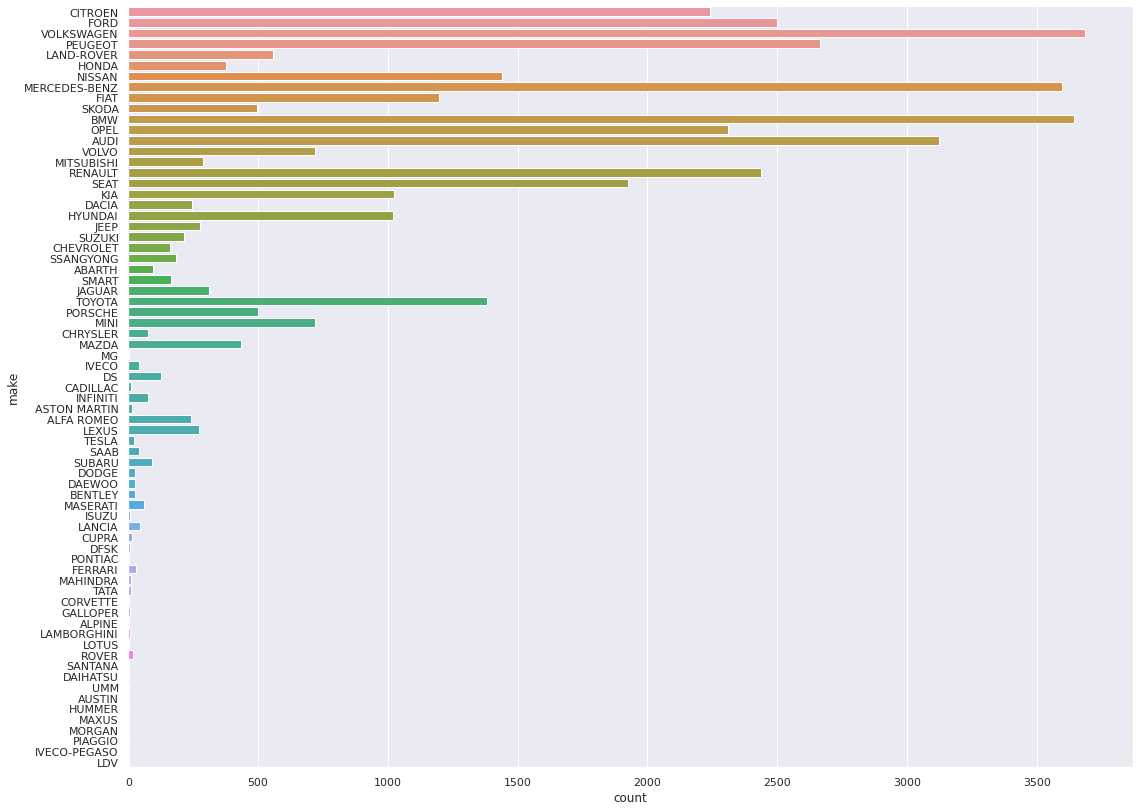

In [ ]:
# Gráfico de Barras
sns.countplot(data=df, y="make")

En el gráfico anterior se observa que se tiene varias marcas de automóviles.

In [ ]:
df['make'].value_counts()

VOLKSWAGEN       3685
BMW              3642
MERCEDES-BENZ    3596
AUDI             3123
PEUGEOT          2663
                 ... 
MAXUS               1
MORGAN              1
PIAGGIO             1
IVECO-PEGASO        1
LDV                 1
Name: make, Length: 71, dtype: int64

In [ ]:
len(df['make'].value_counts())

71

In [ ]:
df['make'].value_counts().head(20)

VOLKSWAGEN       3685
BMW              3642
MERCEDES-BENZ    3596
AUDI             3123
PEUGEOT          2663
FORD             2497
RENAULT          2438
OPEL             2311
CITROEN          2239
SEAT             1924
NISSAN           1439
TOYOTA           1383
FIAT             1196
KIA              1022
HYUNDAI          1018
VOLVO             721
MINI              718
LAND-ROVER        557
PORSCHE           499
SKODA             497
Name: make, dtype: int64

Mediante la salida del anterior código, se considerará en nuevo dataset las marcas que tengan apartir de 1000 registros.

In [ ]:
df = df[df['make'].map(df['make'].value_counts()) > 1000]

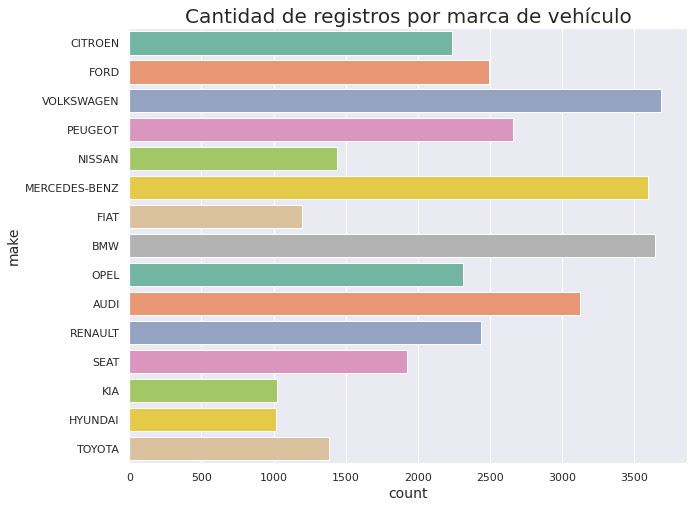

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(10, 8)})
count_make=sns.countplot(data=df, y="make",palette = "Set2")
count_make.axes.set_title("Cantidad de registros por marca de vehículo",fontsize=20)
count_make.set_xlabel("count",fontsize=14)
count_make.set_ylabel("make",fontsize=1)
plt.show()

In [ ]:
df['make'].value_counts()

VOLKSWAGEN       3685
BMW              3642
MERCEDES-BENZ    3596
AUDI             3123
PEUGEOT          2663
FORD             2497
RENAULT          2438
OPEL             2311
CITROEN          2239
SEAT             1924
NISSAN           1439
TOYOTA           1383
FIAT             1196
KIA              1022
HYUNDAI          1018
Name: make, dtype: int64

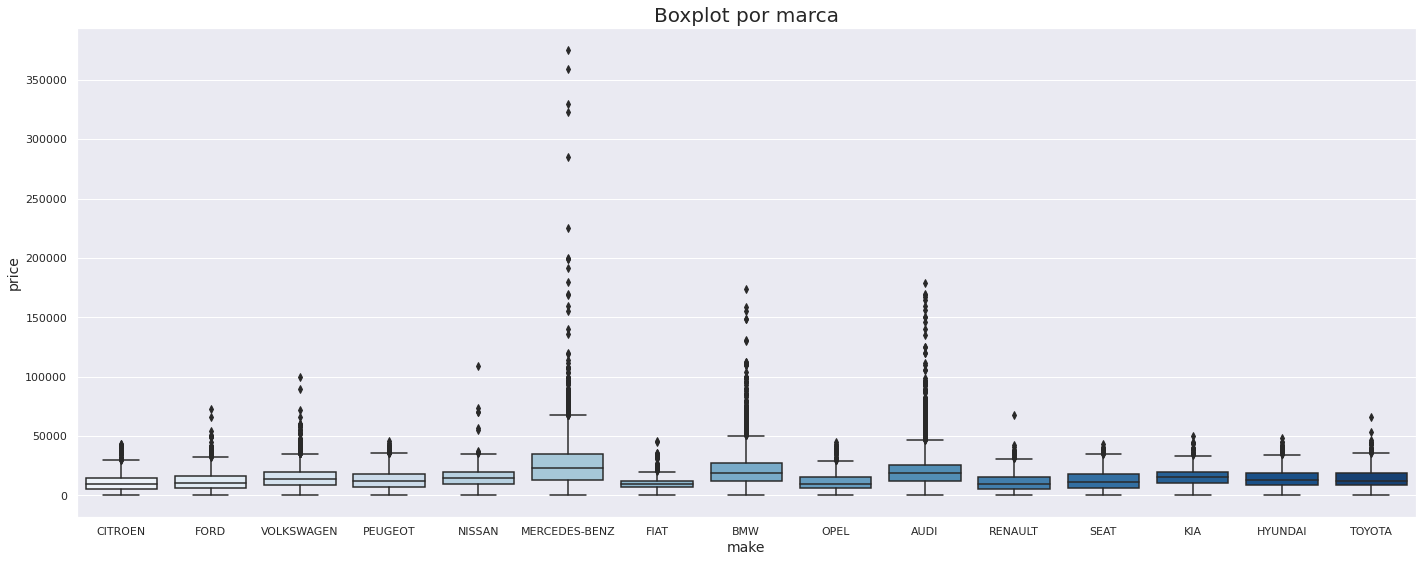

In [ ]:
plt.figure(figsize=(24,9))
boxplot_price_make=sns.boxplot( y=df["price"], x=df["make"], palette="Blues" );
boxplot_price_make.axes.set_title("Boxplot por marca",fontsize=20)
boxplot_price_make.set_xlabel("make",fontsize=14)
boxplot_price_make.set_ylabel("price",fontsize=14)
plt.show()

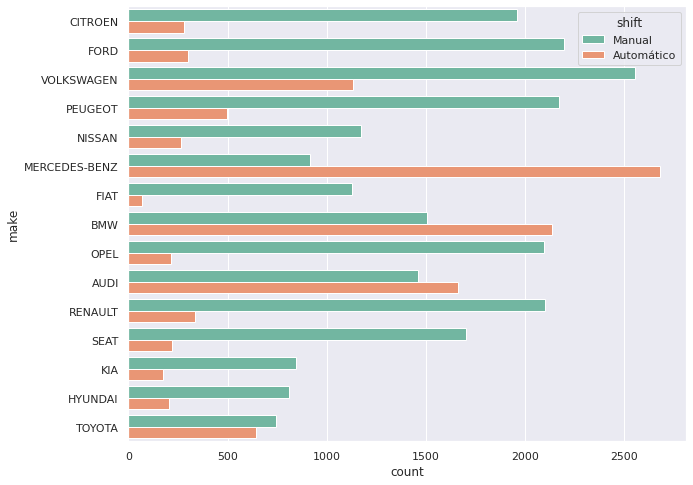

In [ ]:
#Agregar al gráfico un dato "categorico"
sns.countplot(data=df, y='make', hue = 'shift', palette = "Set2")
#El parametro 'palette' te da las paleta de colores para los graficos

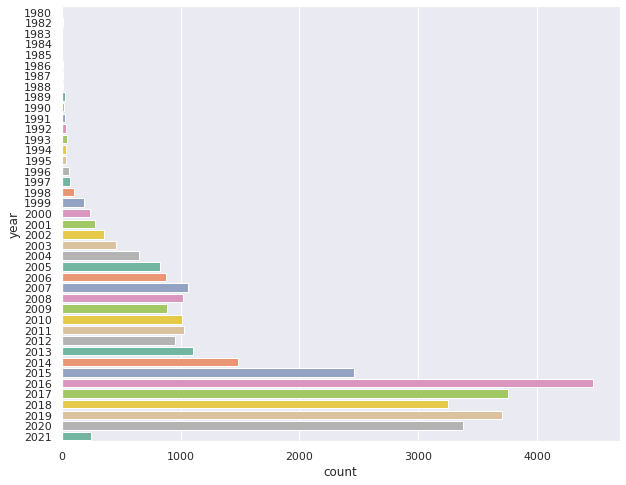

In [ ]:
sns.countplot(data=df, y="year",palette = "Set2")

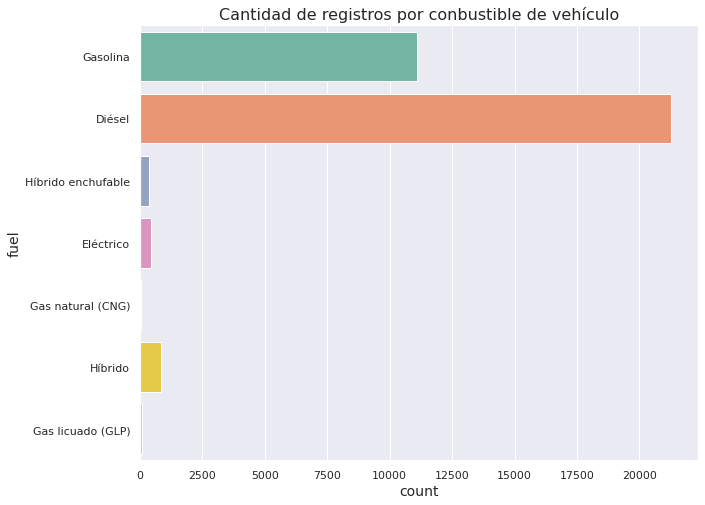

In [ ]:
count_fuel=sns.countplot(data=df, y="fuel",palette = "Set2")
count_fuel.axes.set_title("Cantidad de registros por conbustible de vehículo",fontsize=16)
count_fuel.set_xlabel("count",fontsize=14)
count_fuel.set_ylabel("fuel",fontsize=14)
plt.show()

In [ ]:
df['color'].value_counts().head(20)

Blanco                                8270
Gris / Plata                          6709
Negro                                 5020
Azul                                  3344
Rojo                                  1832
Marrón                                 513
Beige                                  452
Verde                                  382
Granate                                328
Naranja                                178
Amarillo                               176
Gris / Plata (Gris)                    132
Blanco (BLANCO)                        111
300 AlpinweiÃ? (sÃ³lido)                80
Blanco (0Q0Q Blanco Puro)               65
2T2T Negro Profundo (efecto perla)      50
Gris / Plata (Plata)                    49
Violeta / Lila                          48
Blanco (MFP02 Blanco)                   47
Gris / Plata (GRIS)                     47
Name: color, dtype: int64

In [ ]:
df.shape

(34176, 15)

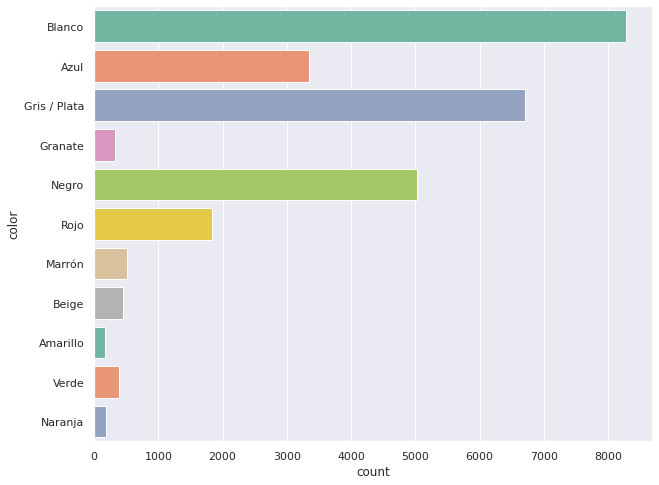

In [ ]:
sns.countplot(data=df[df['color'].map(df['color'].value_counts()) > 132], y="color",palette = "Set2")

In [ ]:
def condiciones(data):
  if (data["color"] == 'Blanco'):
    return "Blanco"
  elif (data["color"] == 'Gris/Plata'):
    return "Gris/Plata"
  elif (data["color"] == 'Negro'):
    return "Negro"
  elif (data["color"] == 'Azul'):
    return "Azul"
  elif (data["color"] == 'Rojo'):
    return "Rojo"
  elif (data["color"] == 'Marrón'):
    return "Marrón"
  elif (data["color"] == 'Beige'):
    return "Beige"
  else:
      return "otros"
df["color"] = df.apply(condiciones,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### ***Análisis de Precios***

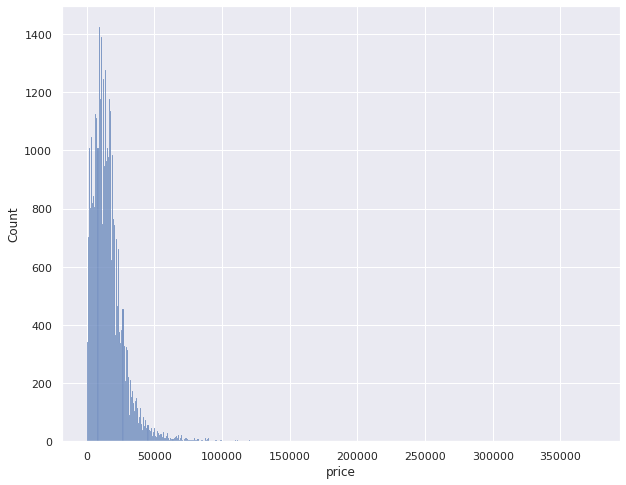

In [ ]:
# Utilizar un histograma para un dato cuantitativo
sns.histplot(data=df, x="price")

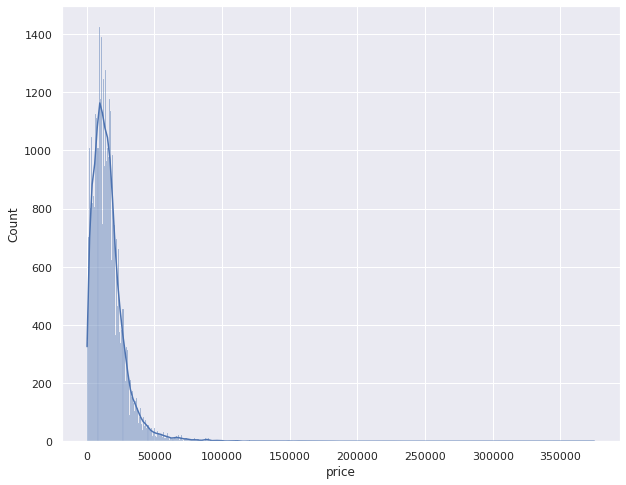

In [ ]:
#se puede agregar la forma de la distribución
sns.histplot(data=df, x="price", kde=True)

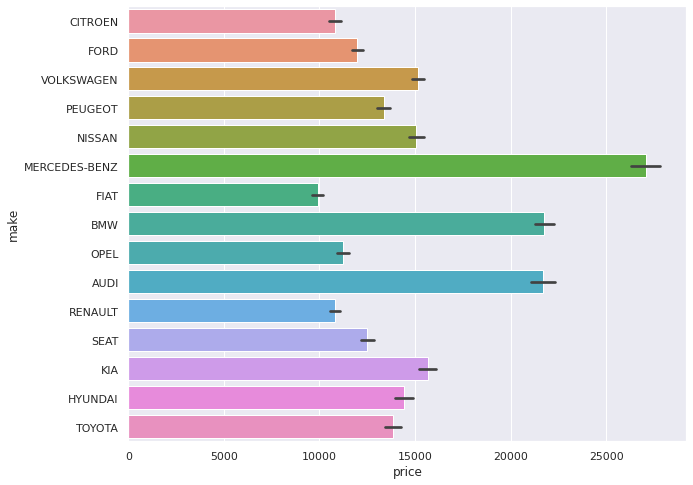

In [ ]:
sns.barplot(data=df, x= 'price', y= 'make')

In [ ]:
df.price[df.make=="KIA"]

39       32300
146       7500
154      10900
188       7900
268      13000
         ...  
49745    14850
49793     5480
49872     7990
49909    13000
49966    11000
Name: price, Length: 1022, dtype: int64

In [ ]:
np.mean(df.price[df.make=="KIA"])

15677.472602739726

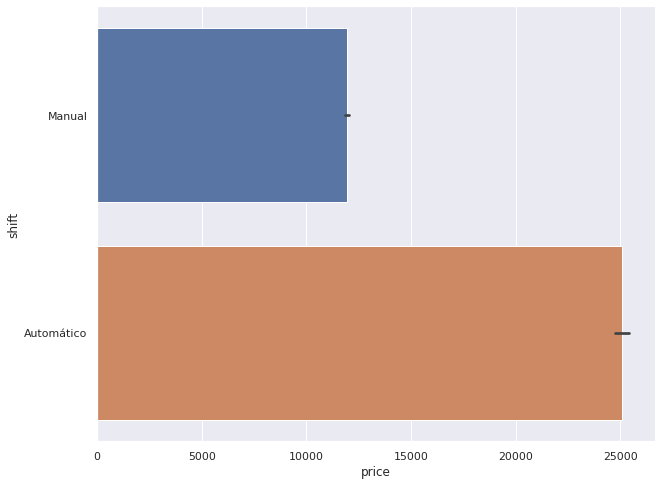

In [ ]:
sns.barplot(data=df, x= 'price', y= 'shift')

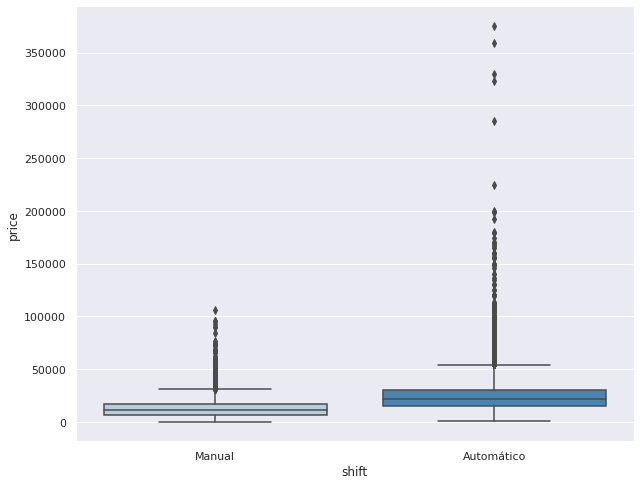

In [ ]:
sns.boxplot(y=df["price"], x=df["shift"], palette="Blues" );
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34176 entries, 1 to 49999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   url              34176 non-null  object        
 1   make             34176 non-null  object        
 2   model            34176 non-null  object        
 3   price            34176 non-null  int64         
 4   fuel             34176 non-null  object        
 5   year             34176 non-null  int64         
 6   kms              34176 non-null  int64         
 7   power            34176 non-null  float64       
 8   doors            34176 non-null  int64         
 9   shift            34176 non-null  object        
 10  color            34176 non-null  object        
 11  is_professional  34176 non-null  object        
 12  province         34176 non-null  object        
 13  publish_date     34176 non-null  datetime64[ns]
 14  insert_date      34176 non-null  objec

In [ ]:
# creamos nuevas variables donde transformamos las variables categóricas a discretas

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["make_code"] = lb_make.fit_transform(df["make"])
df["fuel_code"] = lb_make.fit_transform(df["fuel"])
df["shift_code"] = lb_make.fit_transform(df["shift"])
df["color_code"] = lb_make.fit_transform(df["color"])
df["is_professional_code"] = lb_make.fit_transform(df["is_professional"])
df["province_code"] = lb_make.fit_transform(df["province"])
df["model_code"] = lb_make.fit_transform(df["model"])

df.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,url,make,model,price,fuel,year,kms,power,doors,shift,...,province,publish_date,insert_date,make_code,fuel_code,shift_code,color_code,is_professional_code,province_code,model_code
1,ff267ebb7e700246f47f84f3db660b4b,CITROEN,C1,6200,Gasolina,2017,50071,82.0,5,Manual,...,Tenerife,2021-01-02 11:25:40,2021-01-15 00:00:00,2,4,1,2,1,42,105
2,de4b02db28ea7786c622b969be10c7c7,FORD,Transit Connect,7851,Diésel,2016,103000,100.0,4,Manual,...,Barcelona,2020-12-16 10:51:45,2021-01-15 00:00:00,4,0,1,2,1,7,466


# ***Modelos de ML***

##### siguientes pasos:
##### Se debe justificar el modelo usando metricas y justificar las variables que quedan usando la la matriz de importancia

## ***Árboles de decision para regresión***

In [ ]:
# seleccionamos todas las variables: categoricas y continuas
df_arb = df[['year','kms','power','doors','price','fuel_code','shift_code','make_code','province_code','model_code','is_professional_code']]

In [ ]:
df_arb.columns

Index(['year', 'kms', 'power', 'doors', 'price', 'fuel_code', 'shift_code',
       'make_code', 'province_code', 'model_code', 'is_professional_code'],
      dtype='object')

In [ ]:
X_data_arb = df_arb[['year', 'kms', 'power', 'doors', 'fuel_code', 'shift_code',
       'make_code', 'province_code', 'model_code', 'is_professional_code']]
y_data_arb = df_arb[['price']]

In [ ]:
# Separar Data de Training y data de Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_arb, y_data_arb,
                                                    train_size = 0.80,
                                                    random_state = 20)

In [ ]:
print(X_train.shape, X_test.shape)

(27340, 10) (6836, 10)


In [ ]:
# Ajustar el Random Forest con el dataset
from sklearn.tree import DecisionTreeRegressor

# ** Hiperparametros **


AD_model=DecisionTreeRegressor(max_depth=5)
AD_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
# Evaluacion del modelo de arboles de decision

In [ ]:
y_test = y_test.values.reshape(-1,1)   # valores reales
y_pred = AD_model.predict(X_test)   # valores predichos

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [ ]:
sqrt_mean_squared_error_arb = np.sqrt(mean_squared_error(y_test, y_pred))

# Raiz del error cuadratico medio
print("sqrt_mean_squared_error test: ",sqrt_mean_squared_error_arb)

mean_squared_error test:  5913.381829327728


In [ ]:
mean_absolute_error_arb = mean_absolute_error(y_test, y_pred)
print("mean_absolute_error: ",mean_absolute_error_arb)

mean_absolute_error:  3670.937758727515


In [ ]:
r2_score_arb = r2_score(y_test, y_pred)
print("r2_score: ",r2_score_arb)

# 82 % de la variabilidad del target (precio de venta del vehiculo) se puede explicar por el modelo

r2_score:  0.8161396829733438


In [ ]:
# graficamos las variables mas importantes

Importancia de los predictores en el modelo
-------------------------------------------


power                   0.575949
year                    0.252738
kms                     0.149720
make_code               0.014850
fuel_code               0.006743
doors                   0.000000
shift_code              0.000000
province_code           0.000000
model_code              0.000000
is_professional_code    0.000000
dtype: float64

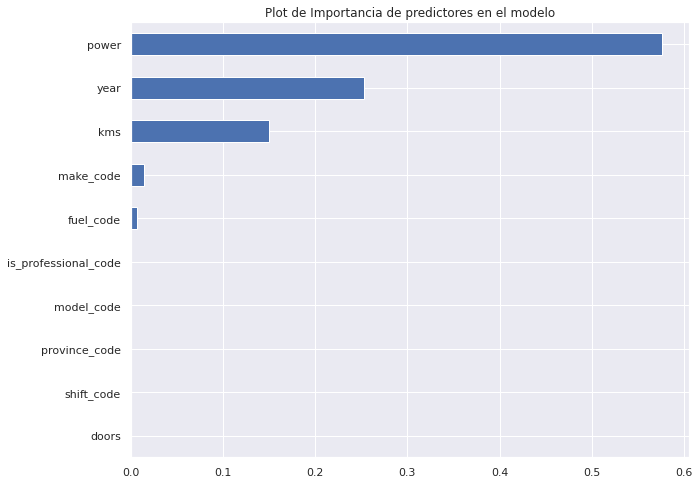

In [ ]:
importances_arb = pd.Series(AD_model.feature_importances_,index=X_train.columns)
importances_arb = importances_arb.sort_values()
importances_arb[-30:].plot.barh()
plt.title("Plot de Importancia de predictores en el modelo");

print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importances_arb.sort_values(ascending=False)

In [ ]:
# Según la importancia de los predictores, las variables más importantes para predecir el precio de un vehículo usado son:
# Power: potencia del motor
# Year: Año modelo del vehículo
# Kms: kilometraje del vehículo
# make: Marca del vehículo
# Fuel: tipo de combustible del vehículo

# Ahora avanzaremos con las variables más importantes

In [ ]:
# Graficamos los resultados

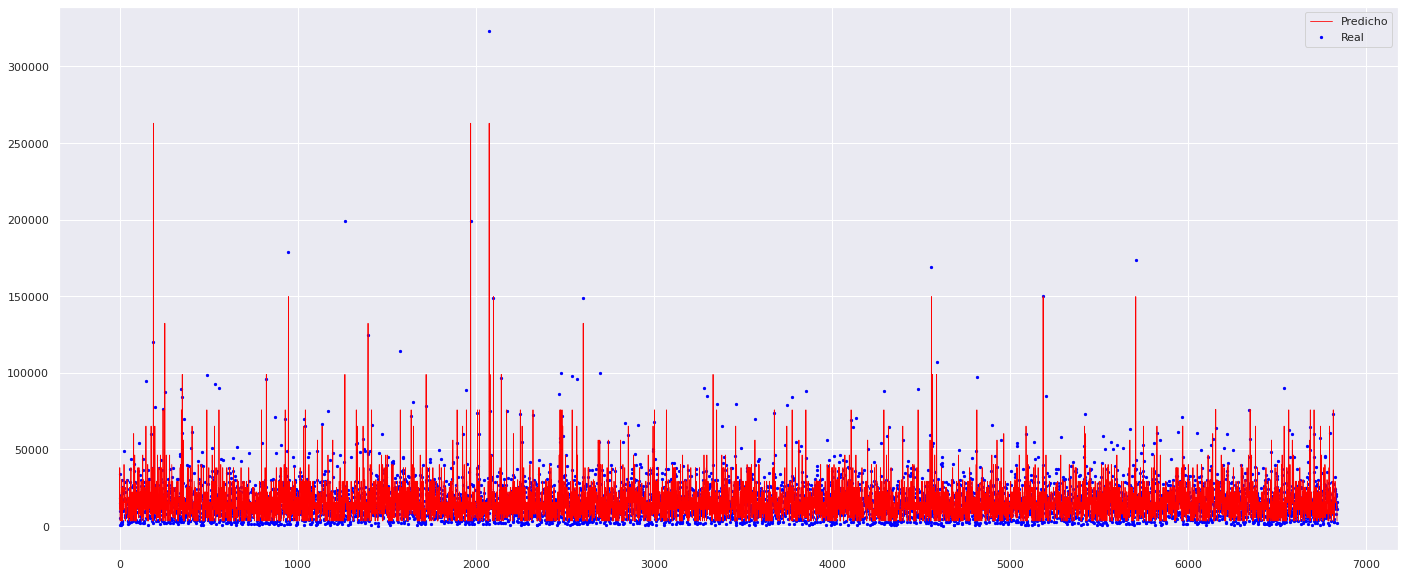

In [ ]:
fig = plt.figure(figsize=(24,10))

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="Real")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="Predicho")
plt.legend()
plt.show()

### ***Árboles de decision para regresión con tratamiento de outliers***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


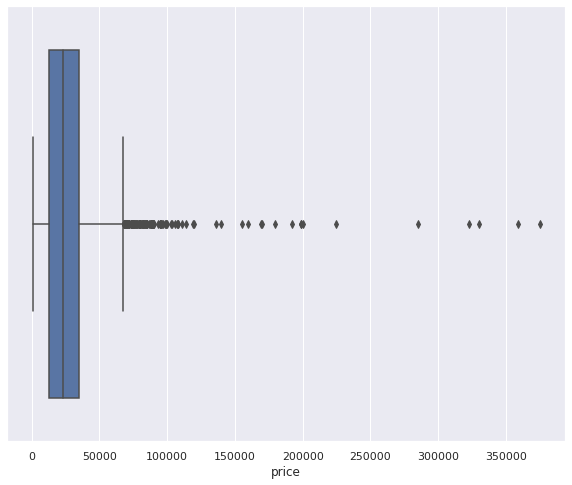

In [ ]:
sns.boxplot(df.price[df.make=='MERCEDES-BENZ'])

In [ ]:
# seleccionamos todas las variables
df_arb_out = df[['year','kms','power','price','fuel','make']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


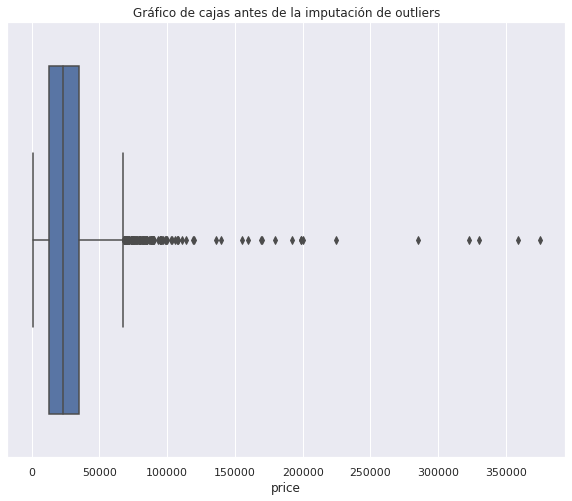

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.

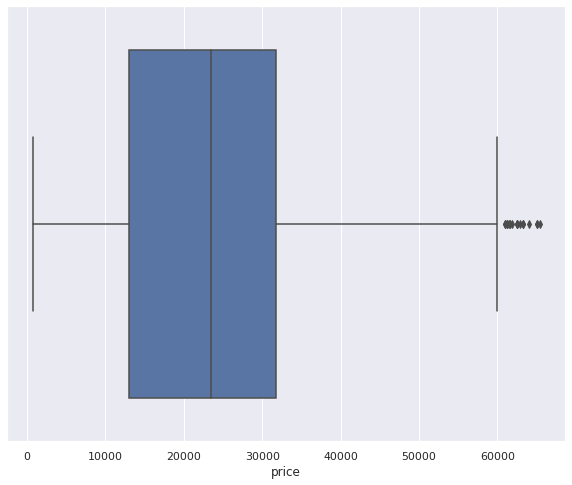

In [ ]:
sns.boxplot(df_arb_out.price[df_arb_out.make=='MERCEDES-BENZ'])
plt.title("Gráfico de cajas antes de la imputación de outliers")
plt.show()

for i in df_arb_out.price[df_arb_out.make=='MERCEDES-BENZ']:
    q1 = df_arb_out.price[df_arb_out.make=='MERCEDES-BENZ'].quantile(0.25)
    q3 = df_arb_out.price[df_arb_out.make=='MERCEDES-BENZ'].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    if i > Upper_tail or i < Lower_tail:
            df_arb_out.price[df_arb_out.make=='MERCEDES-BENZ'] = df_arb_out.price[df_arb_out.make=='MERCEDES-BENZ'].replace(i, np.median(df_arb_out.price[df_arb_out.make=='MERCEDES-BENZ']))

sns.boxplot(df_arb_out.price[df_arb_out.make=='MERCEDES-BENZ'])

In [ ]:
# creamos variables dummies
df_arb_out = pd.get_dummies(df_arb_out, columns = ['fuel','make'], drop_first = True)

In [ ]:
df_arb_out.columns

Index(['year', 'kms', 'power', 'price', 'fuel_Eléctrico',
       'fuel_Gas licuado (GLP)', 'fuel_Gas natural (CNG)', 'fuel_Gasolina',
       'fuel_Híbrido', 'fuel_Híbrido enchufable', 'make_BMW', 'make_CITROEN',
       'make_FIAT', 'make_FORD', 'make_HYUNDAI', 'make_KIA',
       'make_MERCEDES-BENZ', 'make_NISSAN', 'make_OPEL', 'make_PEUGEOT',
       'make_RENAULT', 'make_SEAT', 'make_TOYOTA', 'make_VOLKSWAGEN'],
      dtype='object')

In [ ]:
X_data_arb_out = df_arb_out[['year', 'kms', 'power', 'fuel_Eléctrico',
       'fuel_Gas licuado (GLP)', 'fuel_Gas natural (CNG)', 'fuel_Gasolina',
       'fuel_Híbrido', 'fuel_Híbrido enchufable', 'make_BMW', 'make_CITROEN',
       'make_FIAT', 'make_FORD', 'make_HYUNDAI', 'make_KIA',
       'make_MERCEDES-BENZ', 'make_NISSAN', 'make_OPEL', 'make_PEUGEOT',
       'make_RENAULT', 'make_SEAT', 'make_TOYOTA', 'make_VOLKSWAGEN']]
y_data_arb_out = df_arb_out[['price']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_arb_out, y_data_arb_out,
                                                    train_size = 0.80,
                                                    random_state = 20)

In [ ]:
print(X_train.shape, X_test.shape)

(27340, 23) (6836, 23)


In [ ]:
AD_out_model=DecisionTreeRegressor(max_depth=5)
AD_out_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [ ]:
y_test = y_test.values.reshape(-1,1)   # valores reales
y_pred_arb_out = AD_out_model.predict(X_test)   # valores predichos

In [ ]:
sqrt_mean_squared_error_arb_out = np.sqrt(mean_squared_error(y_test, y_pred_arb_out))

# raiz del Error cuadrático medio
print("sqrt_mean_squared_error test: ",sqrt_mean_squared_error_arb_out)

mean_squared_error test:  5752.975930714461


In [ ]:
mean_absolute_error_arb_out = mean_absolute_error(y_test, y_pred_arb_out)
print("mean_absolute_error: ",mean_absolute_error_arb_out)

mean_absolute_error:  3566.571064516685


In [ ]:
r2_score_arb_out = r2_score(y_test, y_pred_arb_out)
print("r2_score: ",r2_score_arb_out)

r2_score:  0.7738909935621869


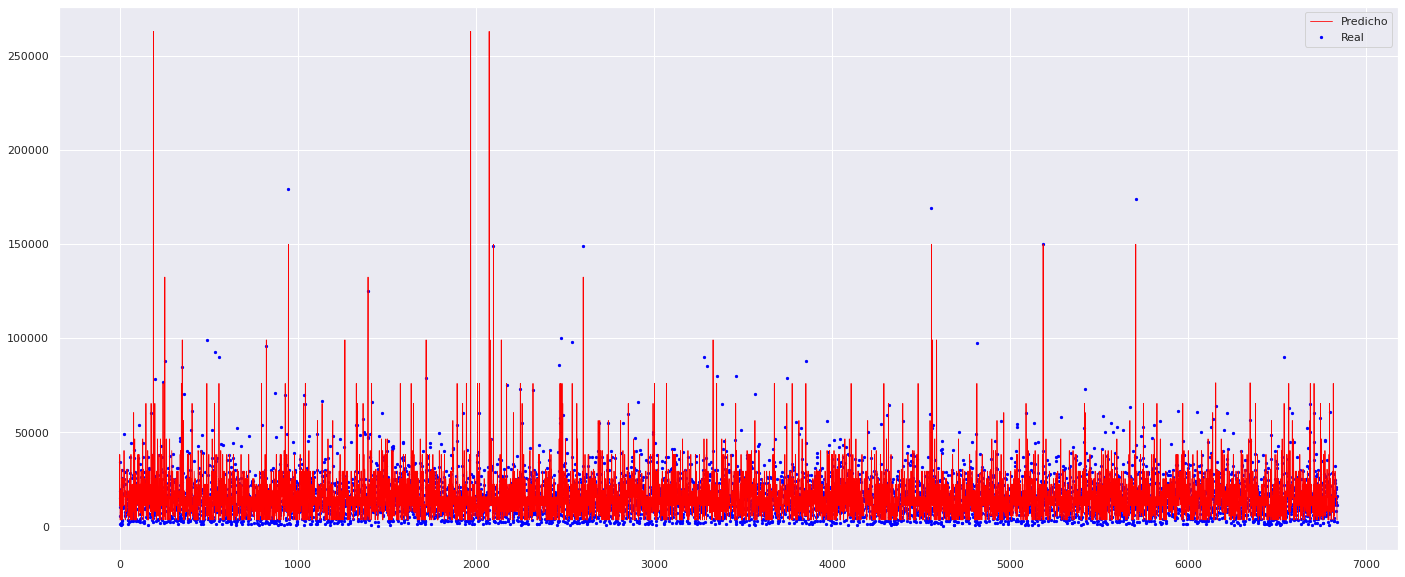

In [ ]:
fig = plt.figure(figsize=(24,10))

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="Real")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="Predicho")
plt.legend()
plt.show()

## ***Random forest para Regresion***

Los árboles pueden, en teoría, manejar tanto predictores numéricos como categóricos sin tener que crear variables dummy o one-hot-encoding. En la práctica, esto depende de la implementación del algoritmo que tenga cada librería.

En scikit-learn es necesario hacer one-hot-encoding de los predictores categóricos

In [ ]:
# seleccionamos todas las variables
df_RF = df[['year','kms','power','price','fuel','make']]

In [ ]:
# creamos variables dummies
df_RF = pd.get_dummies(df_RF, columns = ['fuel','make'], drop_first = True)

In [ ]:
df_RF.columns

Index(['year', 'kms', 'power', 'price', 'fuel_Eléctrico',
       'fuel_Gas licuado (GLP)', 'fuel_Gas natural (CNG)', 'fuel_Gasolina',
       'fuel_Híbrido', 'fuel_Híbrido enchufable', 'make_BMW', 'make_CITROEN',
       'make_FIAT', 'make_FORD', 'make_HYUNDAI', 'make_KIA',
       'make_MERCEDES-BENZ', 'make_NISSAN', 'make_OPEL', 'make_PEUGEOT',
       'make_RENAULT', 'make_SEAT', 'make_TOYOTA', 'make_VOLKSWAGEN'],
      dtype='object')

In [ ]:
X_data_RF = df_RF[['year', 'kms', 'power','fuel_Eléctrico',
       'fuel_Gas licuado (GLP)', 'fuel_Gas natural (CNG)', 'fuel_Gasolina',
       'fuel_Híbrido', 'fuel_Híbrido enchufable', 'make_BMW', 'make_CITROEN',
       'make_FIAT', 'make_FORD', 'make_HYUNDAI', 'make_KIA',
       'make_MERCEDES-BENZ', 'make_NISSAN', 'make_OPEL', 'make_PEUGEOT',
       'make_RENAULT', 'make_SEAT', 'make_TOYOTA', 'make_VOLKSWAGEN']]
y_data_RF = df_RF[['price']]

In [ ]:
# Separar Data de Training y data de Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_RF, y_data_RF,
                                                    train_size = 0.80,
                                                    random_state = 20)

In [ ]:
print(X_train.shape, X_test.shape)

(27340, 23) (6836, 23)


In [ ]:
# Ajustar el Random Forest con el dataset
from sklearn.ensemble import RandomForestRegressor

# ** Hiperparametros **
# Los hiperparámetros de un modelo son los valores de las configuraciones utilizadas durante el proceso de entrenamiento

# n_estimators: número de árboles incluidos en el modelo.
# random_state: semilla para que los resultados sean reproducibles. Tiene que ser un valor entero.
# min_samples_split: número mínimo de observaciones que debe de tener un nodo para que pueda dividirse. Si es un valor decimal
# se interpreta como fracción del total de observaciones de entrenamiento

RF_model = RandomForestRegressor(n_estimators = 40, random_state = 5, min_samples_split=6)
RF_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


RandomForestRegressor(min_samples_split=6, n_estimators=40, random_state=5)

In [ ]:
# Evaluacion del modelo RF

In [ ]:
y_test = y_test.values.reshape(-1,1)   # valores reales
y_pred_RF = RF_model.predict(X_test)   # valores predichos

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [ ]:
sqrt_mean_squared_errorRF = np.sqrt(mean_squared_error(y_test, y_pred))

# sqrt_mean_squared_errorRF
print("mean_squared_error test: ",sqrt_mean_squared_errorRF)

mean_squared_error test:  5913.381829327728


In [ ]:
mean_absolute_error_RF = mean_absolute_error(y_test, y_pred)
print("mean_absolute_error: ",mean_absolute_error_RF)

mean_absolute_error:  3670.937758727515


In [ ]:
r2_score_RF = r2_score(y_test, y_pred)
print("r2_score: ",r2_score_RF)

# 89 % de la variabilidad del target (precio de venta del vehiculo) se puede explicar por el modelo

r2_score:  0.8161396829733438


In [ ]:
# Graficamos los resultados

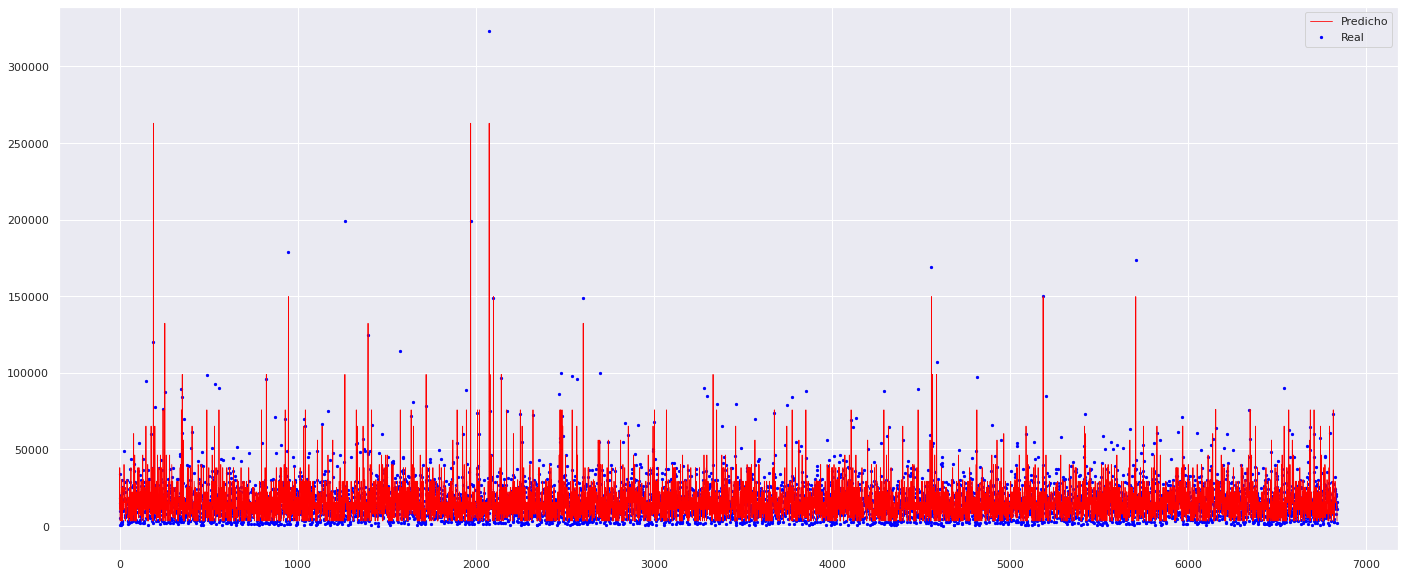

In [ ]:
fig = plt.figure(figsize=(24,10))

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="Real")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="Predicho")
plt.legend()
plt.show()

## ***XGBoost para Regresión***



In [ ]:
# seleccionamos todas las variables
df_XGB = df[['year','kms','power','price','fuel','make']]

In [ ]:
# creamos variables dummies
df_XGB = pd.get_dummies(df_XGB, columns = ['fuel','make'], drop_first = True)

In [ ]:
X_data_XGB = df_XGB[['year', 'kms', 'power','fuel_Eléctrico',
       'fuel_Gas licuado (GLP)', 'fuel_Gas natural (CNG)', 'fuel_Gasolina',
       'fuel_Híbrido', 'fuel_Híbrido enchufable', 'make_BMW', 'make_CITROEN',
       'make_FIAT', 'make_FORD', 'make_HYUNDAI', 'make_KIA',
       'make_MERCEDES-BENZ', 'make_NISSAN', 'make_OPEL', 'make_PEUGEOT',
       'make_RENAULT', 'make_SEAT', 'make_TOYOTA', 'make_VOLKSWAGEN']]
y_data_XGB = df_XGB[['price']]

In [ ]:
# Separar Data de Training y data de Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_XGB, y_data_XGB,
                                                    train_size = 0.80,
                                                    random_state = 20)

In [ ]:
# Modelo XGBoost

import xgboost as xgb

# ** Hiperparametros **
# Los hiperparámetros de un modelo son los valores de las configuraciones utilizadas durante el proceso de entrenamiento
# n_estimators: Número de árboles potenciados por gradiente.
# n_estimators: Impulsar la tasa de aprendizaje
# max_depth: Profundidad máxima del árbol para los learners base.
# random_state: Semilla de número aleatorio.

XGB_model = xgb.XGBRegressor(n_estimators=100,
                    learning_rate = .1,
                    max_depth = 6,
                    random_state=42,
                    n_jobs = -1,
                    early_stopping_rounds=10)
XGB_model.fit(X_train, y_train)

[15:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(early_stopping_rounds=10, max_depth=6, n_jobs=-1, random_state=42)

In [ ]:
# Evaluacion del modelo XGBoost

In [ ]:
y_test = y_test.values.reshape(-1,1)   # valores reales
y_pred = XGB_model.predict(X_test)   # valores predichos

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

In [ ]:
sqrt_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_pred))

# Raiz del Error cuadrático medio
print("sqrt_mean_squared_error test: ",sqrt_mean_squared_error)

mean_squared_error test:  4839.693192992177


In [ ]:
mean_absolute_error = mean_absolute_error(y_test, y_pred)

# Error absoluto medio
print("mean_absolute_error test: ",mean_absolute_error)

mean_absolute_error test:  2277.1736299482404


In [ ]:
r2_score = r2_score(y_test, y_pred)
print("r2_score test: ",r2_score)

# 87 % de la variabilidad del target (precio de venta del vehiculo) se puede explicar por el modelo

r2_score test:  0.8768450643912655


In [ ]:
# Graficamos los resultados

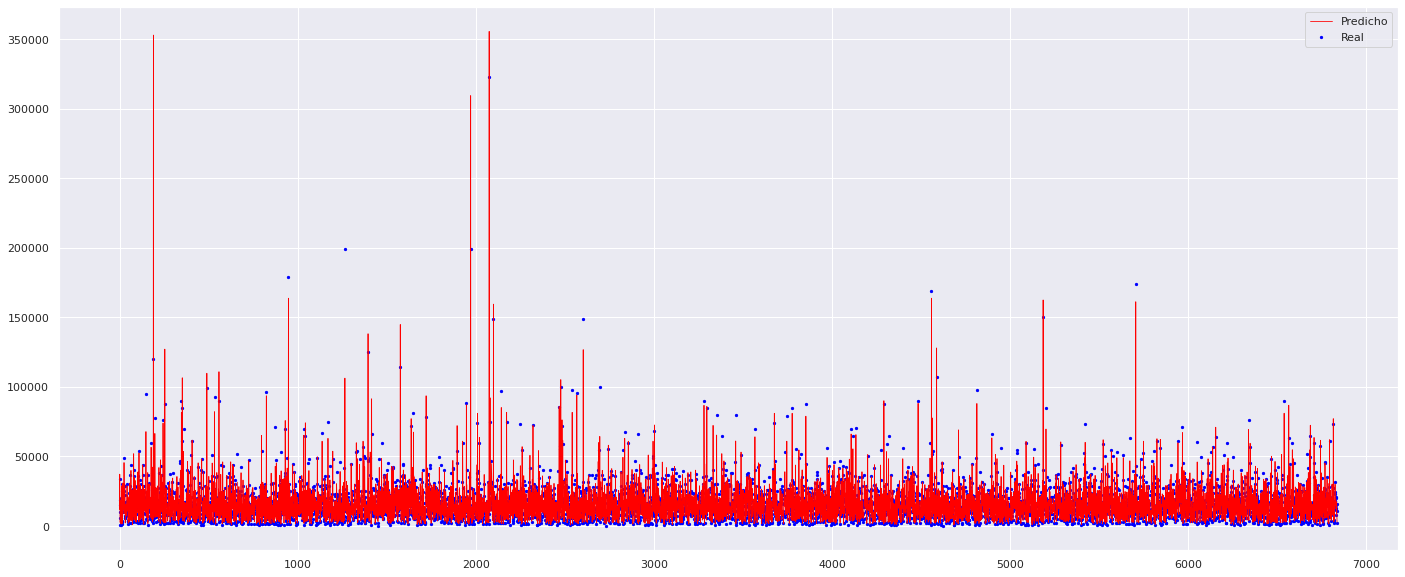

In [ ]:
fig = plt.figure(figsize=(24,10))

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="Real")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="Predicho")
plt.legend()
plt.show()